In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from xgboost import XGBRegressor


from sklearn.linear_model import LinearRegression

In [42]:
df = pd.read_csv("final_dataframe.csv")

In [43]:
df

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,...,GarageYrBlt_2003,GarageYrBlt_2004,GarageYrBlt_2005,GarageYrBlt_2006,GarageYrBlt_2007,GarageYrBlt_2008,GarageYrBlt_2009,GarageYrBlt_2010,GarageYrBlt_Does Not Have,AggSF
0,65,8450,7,5,196,3,2,4,3,1,...,1,0,0,0,0,0,0,0,0,3114
1,80,9600,6,8,0,2,2,4,3,4,...,0,0,0,0,0,0,0,0,0,2984
2,68,11250,7,5,162,3,2,4,3,2,...,0,0,0,0,0,0,0,0,0,3314
3,60,9550,7,5,0,2,2,3,4,1,...,0,0,0,0,0,0,0,0,0,3115
4,84,14260,8,5,350,3,2,4,3,3,...,0,0,0,0,0,0,0,0,0,4179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,62,7917,6,5,0,2,2,4,3,1,...,0,0,0,0,0,0,0,0,0,3060
1454,85,13175,6,6,119,2,2,4,3,1,...,0,0,0,0,0,0,0,0,0,4115
1455,66,9042,7,9,0,4,3,3,4,1,...,0,0,0,0,0,0,0,0,0,3744
1456,68,9717,5,6,0,2,2,3,3,2,...,0,0,0,0,0,0,0,0,0,2396


In [86]:
X = df.drop("SalePrice", axis=1)
# X = df[important_index]

y = np.log1p(df["SalePrice"])
# y = df["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ss = StandardScaler()
scaled_X_train = ss.fit_transform(X_train)
scaled_X_test = ss.transform(X_test)
X

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,...,GarageYrBlt_2003,GarageYrBlt_2004,GarageYrBlt_2005,GarageYrBlt_2006,GarageYrBlt_2007,GarageYrBlt_2008,GarageYrBlt_2009,GarageYrBlt_2010,GarageYrBlt_Does Not Have,AggSF
0,65,8450,7,5,196,3,2,4,3,1,...,1,0,0,0,0,0,0,0,0,3114
1,80,9600,6,8,0,2,2,4,3,4,...,0,0,0,0,0,0,0,0,0,2984
2,68,11250,7,5,162,3,2,4,3,2,...,0,0,0,0,0,0,0,0,0,3314
3,60,9550,7,5,0,2,2,3,4,1,...,0,0,0,0,0,0,0,0,0,3115
4,84,14260,8,5,350,3,2,4,3,3,...,0,0,0,0,0,0,0,0,0,4179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,62,7917,6,5,0,2,2,4,3,1,...,0,0,0,0,0,0,0,0,0,3060
1454,85,13175,6,6,119,2,2,4,3,1,...,0,0,0,0,0,0,0,0,0,4115
1455,66,9042,7,9,0,4,3,3,4,1,...,0,0,0,0,0,0,0,0,0,3744
1456,68,9717,5,6,0,2,2,3,3,2,...,0,0,0,0,0,0,0,0,0,2396


In [87]:
rfr = RandomForestRegressor()

rfr.fit(scaled_X_train, y_train)
y_pred0 = rfr.predict(scaled_X_train)
y_pred = rfr.predict(scaled_X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_pred0))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Train RMSE: {train_rmse}\nTest RMSE: {test_rmse}")

Train RMSE: 0.05166452200513101
Test RMSE: 0.1478345570561269


In [88]:
# Features used =132 (the top important)
# Train RMSE: 10872.57567244795
# Test RMSE: 31327.169785464463

# Features used =252 (the top important)
# Train RMSE: 10968.0749225494
# Test RMSE: 31317.279333587183

# Features used =100 (the top important)
# Train RMSE: 10805.823016808501
# Test RMSE: 30911.613278398007

# Features used =50 (the top important)
# Train RMSE: 11240.72618642726
# Test RMSE: 31044.837560894928


# Features used =110 (the top important)
# Train RMSE: 11110.878848400223
# Test RMSE: 29879.21169545467

In [89]:
lasso = Lasso()

lasso.fit(X_train, y_train)
y_pred0 = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_pred0))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Train RMSE: {train_rmse}\nTest RMSE: {test_rmse}")

Train RMSE: 0.19115798443621518
Test RMSE: 0.21083724650915142


In [90]:
# Features used =132 (the top important)
# Train RMSE: 26900.977127642407
# Test RMSE: 34769.654663535606

# Features used =252 (the top important)
# Train RMSE: 23833.27467543582
# Test RMSE: 34678.98027124445

# Features used =100 (the top important)
# Train RMSE: 27901.775089800736
# Test RMSE: 33489.982852708585

# Features used =50 (the top important)
# Train RMSE: 32197.44009255128
# Test RMSE: 34766.98996229141


# Features used =110 (the top important)
# Train RMSE: 27724.634237145012
# Test RMSE: 34085.38022148854

In [91]:
gbr = GradientBoostingRegressor()

gbr.fit(scaled_X_train, y_train)
y_pred0 = gbr.predict(scaled_X_train)
y_pred = gbr.predict(scaled_X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_pred0))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
log_test_rmse = (np.sqrt(mean_squared_error(np.log(y_test), np.log(y_pred))))
print(gbr.score(scaled_X_test,y_test))
print(f"Train RMSE: {train_rmse}\nTest RMSE: {test_rmse}\n log_test_rmse: {log_test_rmse}")



0.89985019819273
Train RMSE: 0.07840943091025503
Test RMSE: 0.12993413492425387
 log_test_rmse: 0.011155721857840944


In [92]:
testing= pd.DataFrame()
testing["ytest"]=y_test
testing["ypred"]=y_pred
testing

,ytest,ypred
1320,12.154785,12.310227
836,11.512935,11.457077
413,11.652696,11.631369
522,11.976666,11.910037
1035,12.661917,12.610834
...,...,...
479,11.401681,11.660101
1359,12.468441,12.382560
1413,12.077677,12.312709
650,11.589896,11.797540


In [93]:
# Features used =132 (the top important)
# Train RMSE: 13512.08241985413
# Test RMSE: 26769.53712099131

# Features used =252 (the top important)
# Train RMSE: 13553.762894080202
# Test RMSE: 27952.643952363356

# Features used =100 (the top important)
# Train RMSE: 13552.797778151087
# Test RMSE: 27042.012674974452

# Features used =50 (the top important)
# Train RMSE: 14221.953043867901
# Test RMSE: 27787.420929581058

# Features used =110 (the top important)
# Train RMSE: 13554.770504438837
# Test RMSE: 27781.769012262015

In [94]:
xgb = XGBRegressor(objective='reg:squarederror', n_estimators=1000, learning_rate=0.01, max_depth=7) 

xgb.fit(X_train, y_train)
y_pred0 = xgb.predict(X_train)
y_pred = xgb.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_pred0))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Train RMSE: {train_rmse}\nTest RMSE: {test_rmse}")

Train RMSE: 0.037946821692188784
Test RMSE: 0.12810875271113922


In [53]:
# Features used =132 (the top important)
# Train RMSE: 4250.378115433559
# Test RMSE: 28229.364003549268

# Features used =252 (the top important)
# Train RMSE: 4130.241498553838
# Test RMSE: 28705.99171082086

# Features used =100 (the top important)
# Train RMSE: 4255.37150047599
# Test RMSE: 28366.830013347975

In [95]:
lr= LinearRegression()
lr.fit(X_train, y_train)
y_pred0 = lr.predict(X_train)
y_pred = lr.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_pred0))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
print(f"Train RMSE: {train_rmse}\nTest RMSE: {test_rmse}")

Train RMSE: 0.0732491955734107
Test RMSE: 779.2517325669346


In [96]:
# Features used =132 (the top important)
# Train RMSE: 26900.74418849311
# Test RMSE: 34848.01954186513

# Features used =252 (the top important)
# Train RMSE: 26900.74418849311
# Test RMSE: 34848.01954186513

# Features used =100 (the top important)
# Train RMSE: 27901.630973713163
# Test RMSE: 33542.02163772606

<AxesSubplot:>

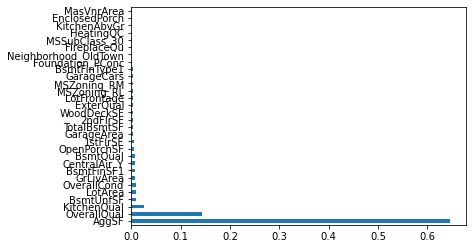

In [97]:
feat_importances = pd.Series(rfr.feature_importances_, index=X.columns)
feat_importances.nlargest(30).plot(kind='barh')

In [98]:

new_important_features= feat_importances.sort_values(ascending=False)

# print(feat_importances.index)

# print(new_important_features.index)


important_index=[] 
i=0

for j in new_important_features.index:
    important_index.append(j)
    if i>130:
        break
    i+=1
    
len(important_index)    
 

132

In [99]:
# X = df.drop("SalePrice", axis=1)
X = df[important_index]

y = np.log1p(df["SalePrice"])
# y = df["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ss = StandardScaler()
scaled_X_train = ss.fit_transform(X_train)
scaled_X_test = ss.transform(X_test)

## Parameter Tuning: Grid Search

In [100]:
# gbr_parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
#                   'subsample'    : [0.9, 0.5, 0.2, 0.1],
#                   'n_estimators' : [100,500,1000, 1500],
#                   'max_depth'    : [4,6,8,10]
#                  }


# grid_gbr = GridSearchCV(estimator= gbr, param_grid=gbr_parameters, cv=3, n_jobs=-1)

# grid_gbr.fit(scaled_X_train, y_train)

# print(" Results from Grid Search " )
# print("\n The best estimator across ALL searched params:\n",grid_gbr.best_estimator_)
# print("\n The best score across ALL searched params:\n",grid_gbr.best_score_)
# print("\n The best parameters across ALL searched params:\n",grid_gbr.best_params_)

In [101]:
best_gbr = GradientBoostingRegressor(learning_rate=0.04, max_depth=4, n_estimators=200,
                          subsample=0.5)

best_gbr.fit(scaled_X_train, y_train)
y_pred0 = best_gbr.predict(scaled_X_train)
y_pred = best_gbr.predict(scaled_X_test)

train_rmse = np.sqrt(mean_squared_error(np.expm1(y_train), np.expm1(y_pred0)))
test_rmse = np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred)))

print(f"Train RMSE: {train_rmse}\nTest RMSE: {test_rmse}")

Train RMSE: 12046.12526318795
Test RMSE: 20915.51680171533


In [77]:
np.expm1()

0.13315260883098562

In [60]:
# Features used =132 (the top important)
# Train RMSE: 3269.8581991147457
# Test RMSE: 25249.814217985793

# Features used =252 (the top important)
# Train RMSE: 3613.6860461828014
# Test RMSE: 27421.66052895415